Expansion Order: ['S', 'B', 'C', 'A', 'G']
Optimal Path: ['S', 'A', 'C', 'G']


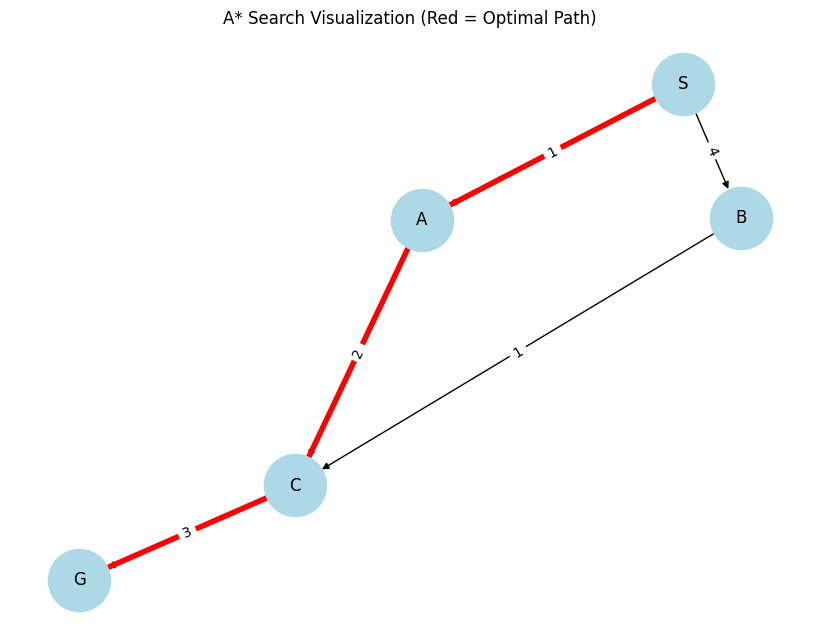

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def a_star_visual(graph, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_cost = {node: float('inf') for node in graph}
    g_cost[start] = 0

    parent = {}
    closed = []
    expansion_order = []

    while open_list:
        f, current = heapq.heappop(open_list)

        if current in closed:
            continue

        expansion_order.append(current)

        if current == goal:
            break

        closed.append(current)

        for neighbor, cost in graph[current]:
            tentative_g = g_cost[current] + cost

            if tentative_g < g_cost[neighbor]:
                parent[neighbor] = current
                g_cost[neighbor] = tentative_g
                f_value = tentative_g + heuristic[neighbor]
                heapq.heappush(open_list, (f_value, neighbor))

    # Reconstruct path
    path = []
    node = goal
    while node in parent:
        path.append(node)
        node = parent[node]
    path.append(start)
    path.reverse()

    return path, expansion_order


# Example Graph
graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 2)],
    'B': [('C', 1)],
    'C': [('G', 3)],
    'G': []
}

heuristic = {
    'S': 7,
    'A': 6,
    'B': 2,
    'C': 1,
    'G': 0
}

path, expansion = a_star_visual(graph, 'S', 'G', heuristic)

print("Expansion Order:", expansion)
print("Optimal Path:", path)


# ---------- Visualization ----------

G = nx.DiGraph()

for node in graph:
    for neighbor, cost in graph[node]:
        G.add_edge(node, neighbor, weight=cost)

pos = nx.spring_layout(G)

plt.figure(figsize=(8,6))

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue")

# Highlight path
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color="red")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("A* Search Visualization (Red = Optimal Path)")
plt.show()